- Aproximacion de Chebyshev -
Epsilon2=  0.7782794100389228
Grado del filtro:  1

Transferencia Pasabajos como SOS


<IPython.core.display.Math object>


Transferencia Pasabanda como SOS


<IPython.core.display.Math object>

'\nEn este punto, si la simulacion salio bien de acuerdo a la plantilla, puedo\npasar a la implementacion circuital\n\n\n#Esto me devuelve numerador y denominador de las distintas secciones\n#que componen el filtro\n\nsos= tc2.tf2sos_analog(num,den)\nprint(sos)\n'

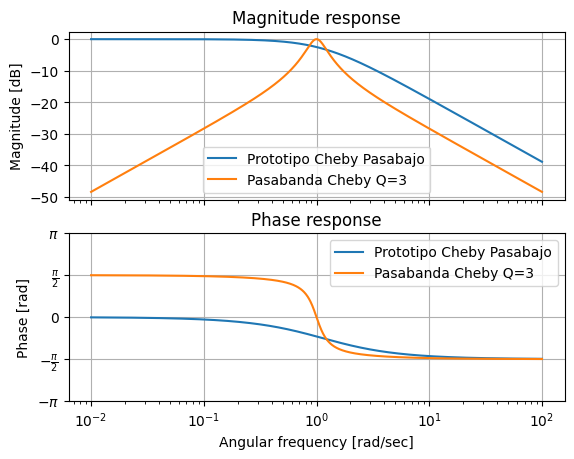

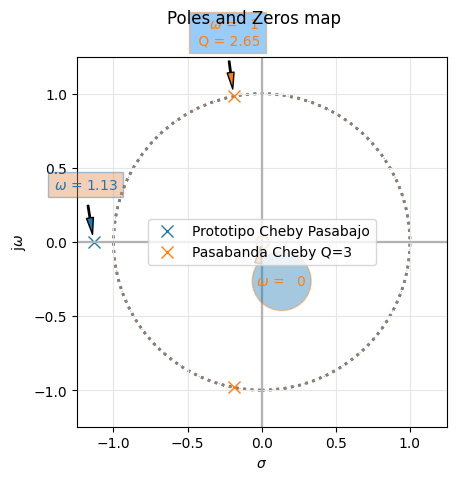

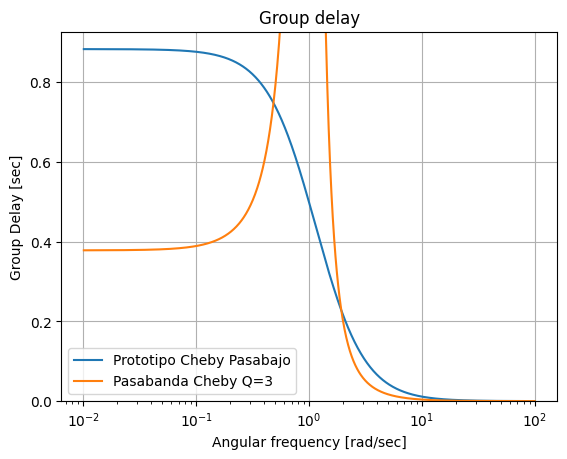

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 16 00:18:45 2023

@author: santi
"""

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
import pytc2.sistemas_lineales as tc2


#Defino los parametros de la plantilla
w0=1
ws1=0.1
ws2=10

Ws= 29.7

alfa_max= 2.5   #en dB
alfa_min= 15    #en dB
Q_bp= 3

ee2= 10**(alfa_max/10) - 1

alfa=0
n=0

while(alfa<alfa_min):
    n+=1
    alfa= 10* np.log10(1 + (ee2 * np.cosh(n*np.arccosh(Ws))**2))

print("- Aproximacion de Chebyshev -")
print("Epsilon2= ",ee2)
print("Grado del filtro: ",n)

plt.close('all')

#Generacion del filtro

z,p,k= sig.cheb1ap(n, alfa_max)
num_lp, den_lp= sig.zpk2tf(z,p,k)
tf_lp= sig.TransferFunction(num_lp,den_lp)

sos_lp = tc2.tf2sos_analog(num_lp, den_lp)
print("\nTransferencia Pasabajos como SOS")
tc2.pretty_print_SOS(sos_lp)

tc2.analyze_sys(tf_lp, sys_name="Prototipo Cheby Pasabajo")

#Transformacion a pasabanda

num_bp, den_bp= sig.lp2bp(num_lp, den_lp, bw = 1/Q_bp)
tf_bp= sig.TransferFunction(num_bp, den_bp)

sos_bp = tc2.tf2sos_analog(num_bp, den_bp)
print("\nTransferencia Pasabanda como SOS")
tc2.pretty_print_SOS(sos_bp)

tc2.analyze_sys(tf_bp, sys_name="Pasabanda Cheby Q=3")
"""
En este punto, si la simulacion salio bien de acuerdo a la plantilla, puedo
pasar a la implementacion circuital


#Esto me devuelve numerador y denominador de las distintas secciones
#que componen el filtro

sos= tc2.tf2sos_analog(num,den)
print(sos)
"""
